# Modelo Regresión Polinomial 

Cargar el dataset

In [198]:
import pandas as pd
df=pd.read_csv('Libro1.csv', sep = ';')

Expresar las fechas en numero de dias desde el 01 Enero de 2020

In [199]:
from datetime import datetime,timedelta
import datetime as dt
FMT = '%d/%m/%Y'
df['date'] = df['date'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2020", FMT)).days)
df.head()

iso_code      continent location  date  total_cases  new_cases  \
0      ECU  South America  Ecuador    60            6          6   
1      ECU  South America  Ecuador    61            6          0   
2      ECU  South America  Ecuador    62            7          1   
3      ECU  South America  Ecuador    63           10          3   
4      ECU  South America  Ecuador    64           13          3   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.340                  0.340   
1                    0.340                  0.000   
2                    0.397                  0.057   
3                    0.567                  0.170   
4                    0.737                  0.170   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  
0                     NaN                              NaN                NaN  
1                     NaN                              NaN                NaN  
2                     NaN                              NaN                NaN  
3                     NaN                              NaN                NaN  
4                     NaN                              NaN                NaN

Extraer solamente las columnas importantes, fecha y casos totales

In [200]:
df=df[['date','total_cases']]
df

date  total_cases
0      60            6
1      61            6
2      62            7
3      63           10
4      64           13
..    ...          ...
406   466       346817
407   467       347070
408   468       347589
409   469       350539
410   470       355431

[411 rows x 2 columns]

Gráfico de los contagios

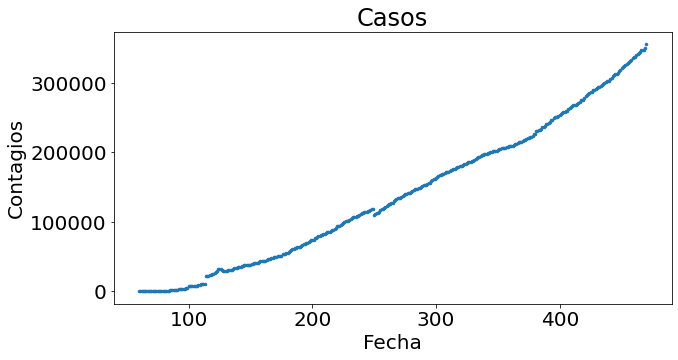

In [201]:
import numpy as np  
import matplotlib.pyplot as plt  

plt.figure(figsize = (10,5))
x = df['date'].values.reshape(-1,1)
y = df['total_cases'].values.reshape(-1,1)
plt.plot(x, y,'.', markersize = 5, label ='')
plt.title('Casos')  
plt.xlabel('Fecha')  
plt.ylabel('Contagios') 

plt.show()


In [202]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

División del dataset en datos para el entrenamiento y el test

In [203]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Entrenamiento del modelo de regresión polinomial

In [204]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

## Predicción para un día específico

In [209]:
date_string = "24/12/2021"
hoy = "15/4/2021"
FMT = '%d/%m/%Y'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("01/01/2020", FMT)).days
hoy1 =  (datetime.strptime(hoy, FMT) - datetime.strptime("01/01/2020", FMT)).days
y_pred = pol_reg.predict(poly_reg.fit_transform([[nuevaFecha]]))

df3 = pd.DataFrame({"Hoy": df[df.date == hoy1]['total_cases'], date_string: round(y_pred[0])}) 

Resultado de la predicción el dia actual vs un día en específico

In [210]:
df3

Hoy  24/12/2021
410  355431     1727727

Gráfico del modelo de regresión vs los casos reales

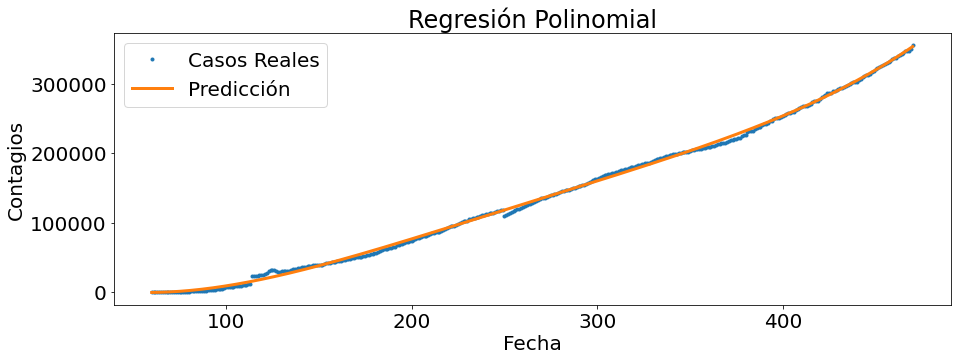

In [188]:
plt.figure(figsize = (15,5))
def polymonial():
    plt.plot(x, y,'.', label ='Casos Reales')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)),  '-', label = 'Predicción', linewidth = 3)
    plt.title('Regresión Polinomial')
    plt.xlabel('Fecha')
    plt.ylabel('Contagios')
    plt.legend(loc="upper left")
    plt.show()
    return

polymonial()